# pandas exercises

We'll use the sample datset from the Social Secury Administration on baby names:
https://www.ssa.gov/oact/babynames/limits.html

Download the "National" version and unzip it.  There will be one file for each year.

This example follows the _Python for Data Analysis_ book closely

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Let's start by reading in just a single dataset, for the first year available (1880).  We give the names of the colums here.  The index will just be the line / record number in the file (not really important for us)

In [2]:
names_1880 = pd.read_csv('babynames/yob1880.txt', names=["name", "sex", "births"])
names_1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


## number of births

Now we want to start doing some analysis.  `.groupby()` creates a new type of container that groups items.  Here, we'll group by sex.

See this:
http://pandas.pydata.org/pandas-docs/stable/groupby.html
https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/

for a nice explanation of this method.

In [3]:
names_1880.groupby("sex")["births"].sum()

sex
F     90992
M    110490
Name: births, dtype: int64

Note that we can use a column name as a parameter of the object, so we can equivalently do this as:

In [4]:
names_1880.groupby("sex").births.sum()

sex
F     90992
M    110490
Name: births, dtype: int64

On its own, you can't print a `GroupBy` object.  You need to do a transformation or filter on it to get back a `Series` or `DataFrame`.

In [5]:
gb = names_1880.groupby("sex")
gb.count()

,name,births
sex,,
F,942,942
M,1058,1058


As we saw in the intro, we can propagate a scalar to all indices in the `DataFrame`.  We'll use this to add a new column that represents the year:

In [6]:
names_1880["year"] = 1880
names_1880

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


## all data sets

Now we can read in all of the datasets.  We will read them in one-by-one and add the "year" column to them.  We'll keep a list of all the `DataFrame`s and then we'll use a pandas method to transform this list of `DataFrame`s into a single `DataFrame`

In [7]:
years = range(1880, 2016)

pieces = []
columns = ["name", "sex", "births"]

for yr in years:
    frame = pd.read_csv("babynames/yob{}.txt".format(yr), names=columns)
    
    # this creates a new column and gives all rows the same value -- the year
    frame["year"] = yr
    pieces.append(frame)

# create a single dataframe through concatenation -- ignore_index means that
# we don't care about the original line numbers
names = pd.concat(pieces, ignore_index=True)

In [8]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


## pivot tables

a _pivot table_ creates a new dataframe from our orignal one, usually summarizing the data in a new way.  In particular, with a pivot table, we can create a new index and columns, with the data in the `DataFrame` reduced via some operation across another column.

Here, the column that we are going to aggregrate is "births", and the function will will use for the aggregating is `sum` (to sum over the names).

In [9]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [10]:
total_births = names.pivot_table("births", index="year", columns="sex", aggfunc=sum)

In [11]:
total_births

sex,F,M
year,,
1880,90992,110490
1881,91953,100743
1882,107848,113686
1883,112318,104627
1884,129020,114443
1885,133055,107799
1886,144534,110785
1887,145981,101415
1888,178624,120850


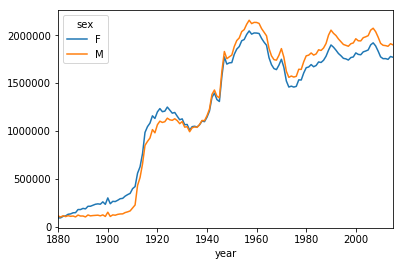

In [12]:
total_births.plot()

## `.apply()` and new columns

Now we'll use `.groupby()` again to allow use to derive a new column -- the fraction of the births with the name specified by the index.  

`apply()` uses what Pandas calls the _split-apply-combine_ rules, e.g., it splits the data into groups, applies your function, and then intelligently concatenates it back together.  Here, the result will be a `DataFrame` with the original information and this new column.

In [13]:
def add_prop(group):
    group["prop"] = group["births"]/group["births"].sum()
    return group

names = names.groupby(["year", "sex"]).apply(add_prop)

In [14]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


## Q1: Sanity check

Verify that within each of the groups we just used above that the "prop" column sums to 1 (it should be close, to roundoff).  The `np.allclose()` function might be useful here.

Now we will group by "year" and "sex" and then sort by births to get just the top N most popular names.

Notice that we simply append any additional arguments to our apply function after the function name (this is an example of the `**kwargs` behavior in python

In [15]:
def get_top(group, N=1000):
    return group.sort_values(by="births", ascending=False)[:N]

grouped = names.groupby(["year", "sex"])
top = grouped.apply(get_top, 1000)

In [16]:
top

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077644
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021310
         4           Minnie   F    1746  1880  0.019189
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011485
         15          Martha   F    1040  1880  0.011430
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     796  1880  0.008748
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2015 M   1845703     Yadiel   M     211  2015  0.000111
         1845704      Yahya   M     211  2015  0.000111
         1845700     Aarush   M     211  2015  0.000111
         1845702      Robin   M     211  2015  0.000111
         1845701   Deangelo   M     211  2015  0.000111
         1845705      Boden   M     209  2015  0.000110
         1845707        Kye   M     209  2015  0.000110
         1845708      Kylen   M     209  2015  0.000110
         1845709       Todd   M     209  2015  0.000110
         1845710     Truman   M     209  2015  0.000110
         1845706        Ean   M     209  2015  0.000110
         1845712    Gilbert   M     208  2015  0.000110
         1845713     Haiden   M     208  2015  0.000110
         1845711      Chevy   M     208  2015  0.000110
         1845715    Dangelo   M     207  2015  0.000109
         1845716      Juelz   M     207  2015  0.000109
         1845717    Osvaldo   M     207  2015  0.000109
         1845714    Brixton   M     207  2015  0.000109
         1845718     Bishop   M     206  2015  0.000108
         1845719     Freddy   M     206  2015  0.000108
         1845720     Reagan   M     206  2015  0.000108
         1845721    Frankie   M     205  2015  0.000108
         1845722     Malaki   M     205  2015  0.000108
         1845725    Jayvion   M     204  2015  0.000107
         1845726      Leroy   M     204  2015  0.000107
         1845724    Deshawn   M     204  2015  0.000107
         1845723     Camren   M     204  2015  0.000107
         1845728     Jaydon   M     203  2015  0.000107
         1845727      Briar   M     203  2015  0.000107
         1845730       Ayan   M     202  2015  0.000106

[271877 rows x 5 columns]

## Q2: split by sex

create two new dataframes, one `boys` with just those in `top` that are "M" and one `girls` with those in `top` who are "F"

In [17]:
boys

NameError: name 'boys' is not defined

## More analysis

How many times does each name appear, by year?  This dataframe is the total number of births by year and name

In [18]:
total_births = top.pivot_table("births", index="year", columns="name", aggfunc=sum)

/usr/lib64/python3.6/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


In [19]:
total_births

name,Aaden,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
1885,NaN,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,NaN,...,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN
1886,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,...,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN
1887,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,...,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN
1888,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,...,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN


In [20]:
total_births["John"]

year
1880     9701.0
1881     8795.0
1882     9597.0
1883     8934.0
1884     9428.0
1885     8801.0
1886     9074.0
1887     8166.0
1888     9299.0
1889     8600.0
1890     8558.0
1891     7724.0
1892     9093.0
1893     8110.0
1894     8298.0
1895     8381.0
1896     8189.0
1897     7596.0
1898     8214.0
1899     7030.0
1900     9875.0
1901     6938.0
1902     7945.0
1903     7649.0
1904     8148.0
1905     8103.0
1906     8307.0
1907     9048.0
1908     9400.0
1909     9658.0
         ...   
1986    30410.0
1987    29732.0
1988    29561.0
1989    29838.0
1990    29066.0
1991    27798.0
1992    26241.0
1993    24989.0
1994    24175.0
1995    23232.0
1996    22169.0
1997    21372.0
1998    20615.0
1999    20341.0
2000    20084.0
2001    18879.0
2002    17442.0
2003    17222.0
2004    16439.0
2005    15760.0
2006    15153.0
2007    14424.0
2008    13310.0
2009    12103.0
2010    11543.0
2011    11027.0
2012    10607.0
2013    10687.0
2014    10659.0
2015    10303.0
Name: John, Length:

We can see that this matches what we had in our previous data frame

In [21]:
top[top.name=="John"]

name sex  births  year      prop
year sex                                          
1880 F   228      John   F      46  1880  0.000506
     M   942      John   M    9655  1880  0.087383
1881 F   2312     John   F      26  1881  0.000283
     M   2938     John   M    8769  1881  0.087043
1882 F   4212     John   F      40  1882  0.000371
     M   4963     John   M    9557  1882  0.084065
1883 F   6340     John   F      40  1883  0.000356
     M   7116     John   M    8894  1883  0.085007
1884 F   8454     John   F      40  1884  0.000310
     M   9318     John   M    9388  1884  0.082032
1885 F   10739    John   F      45  1885  0.000338
     M   11640    John   M    8756  1885  0.081225
1886 F   13036    John   F      48  1886  0.000332
     M   14019    John   M    9026  1886  0.081473
1887 F   15414    John   F      56  1887  0.000384
     M   16435    John   M    8110  1887  0.079968
1888 F   17834    John   F      52  1888  0.000291
     M   18976    John   M    9247  1888  0.076516
1889 F   20498    John   F      52  1889  0.000292
     M   21632    John   M    8548  1889  0.077300
1890 F   23086    John   F      56  1890  0.000294
     M   24277    John   M    8502  1890  0.076577
1891 F   25816    John   F      44  1891  0.000237
     M   26971    John   M    7680  1891  0.075895
1892 F   28460    John   F      54  1892  0.000254
     M   29759    John   M    9039  1892  0.074068
1893 F   31361    John   F      61  1893  0.000287
     M   32671    John   M    8049  1893  0.071663
1894 F   34211    John   F      60  1894  0.000269
     M   35552    John   M    8238  1894  0.071158
...                ...  ..     ...   ...       ...
1987 M   1015237  John   M   29535  1987  0.015830
1988 F   1024361  John   F     167  1988  0.000094
     M   1037259  John   M   29394  1988  0.015367
1989 M   1060288  John   M   29838  1989  0.014918
1990 M   1084747  John   M   29066  1990  0.014160
1991 M   1109686  John   M   27798  1991  0.013765
1992 M   1134943  John   M   26241  1992  0.013144
1993 M   1160554  John   M   24989  1993  0.012746
1994 M   1186469  John   M   24175  1994  0.012517
1995 M   1212466  John   M   23232  1995  0.012208
1996 M   1238683  John   M   22169  1996  0.011708
1997 M   1265371  John   M   21372  1997  0.011342
1998 M   1292776  John   M   20615  1998  0.010791
1999 M   1321012  John   M   20341  1999  0.010600
2000 M   1350272  John   M   20084  2000  0.010234
2001 M   1380350  John   M   18879  2001  0.009724
2002 M   1410730  John   M   17442  2002  0.008991
2003 M   1441635  John   M   17222  2003  0.008726
2004 M   1473212  John   M   16439  2004  0.008290
2005 M   1505607  John   M   15760  2005  0.007899
2006 M   1539014  John   M   15153  2006  0.007382
2007 M   1573596  John   M   14424  2007  0.006960
2008 M   1608427  John   M   13310  2008  0.006535
2009 M   1643211  John   M   12103  2009  0.006113
2010 M   1677534  John   M   11543  2010  0.006029
2011 M   1711330  John   M   11027  2011  0.005821
2012 M   1745139  John   M   10607  2012  0.005610
2013 M   1778561  John   M   10687  2013  0.005673
2014 M   1811736  John   M   10659  2014  0.005578
2015 M   1844755  John   M   10303  2015  0.005426

[245 rows x 5 columns]

Which names are the most popular of all time?

In [22]:
a = total_births.sum()
a.sort_values(ascending=False)

name
James          5142912.0
John           5116313.0
Robert         4822265.0
Michael        4343106.0
Mary           4131873.0
William        4086383.0
David          3600738.0
Joseph         2589732.0
Richard        2565300.0
Charles        2381863.0
Thomas         2295502.0
Christopher    2011702.0
Daniel         1886299.0
Elizabeth      1613326.0
Patricia       1574798.0
Matthew        1569338.0
Jennifer       1467548.0
George         1465334.0
Linda          1454380.0
Barbara        1436646.0
Anthony        1417510.0
Donald         1412138.0
Paul           1385235.0
Mark           1347586.0
Edward         1286089.0
Steven         1276499.0
Kenneth        1269967.0
Andrew         1267471.0
Margaret       1244662.0
Joshua         1187636.0
                 ...    
Amado                5.0
Pryor                5.0
Laban                5.0
Sheppard             5.0
Vinia                5.0
Tella                5.0
Tilford              5.0
Estie                5.0
Jep                 

Let's plot naming trends, for a few of the most popular names

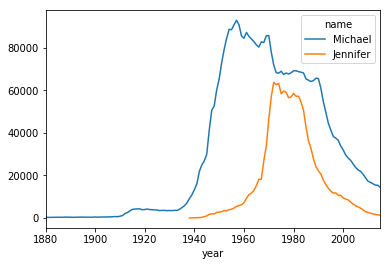

In [23]:
subset = total_births[["Michael", "Jennifer"]]
subset.plot()

# Exercises

## Q3: unique names

how many unique names appear in our top 1000 list?  Use the `.unique()` method on the "name" `Series` to get a an array (it will actually be a NumPy `ndarray` of objects)

## Q4: gender neutral names

What are all the names that appear for both boys and girls?

## Q5: name diversity

We want to make a plot of how many names it takes to reach 50% of the births in a given year.  Let's start with the boys names:

In [24]:
boys = top[top.sex == "M"]

Now, to understand the process, let's work just on a particular year, 2015

In [25]:
b15 = boys[boys.year == 2015]

In [26]:
b15.info

<bound method DataFrame.info of                        name sex  births  year      prop
year sex                                               
2015 M   1844730       Noah   M   19511  2015  0.010275
         1844731       Liam   M   18281  2015  0.009627
         1844732      Mason   M   16535  2015  0.008708
         1844733      Jacob   M   15816  2015  0.008329
         1844734    William   M   15809  2015  0.008326
         1844735      Ethan   M   14991  2015  0.007895
         1844736      James   M   14705  2015  0.007744
         1844737  Alexander   M   14460  2015  0.007615
         1844738    Michael   M   14321  2015  0.007542
         1844739   Benjamin   M   13608  2015  0.007166
         1844740     Elijah   M   13511  2015  0.007115
         1844741     Daniel   M   13408  2015  0.007061
         1844742      Aiden   M   13378  2015  0.007045
         1844743      Logan   M   12862  2015  0.006774
         1844744    Matthew   M   12648  2015  0.006661
         1844745

We'll use the `cumsum()` property to do a cumulative sum over the `prop` column we added previously

In [27]:
prop_cumsum = b15.sort_values(by="prop", ascending=False)["prop"].cumsum()

and now we can use `searchsorted` to return the position where "if the corresponding elements in v were inserted before the indices, the order of self would be preserved." (see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.searchsorted.html)

In [28]:
prop_cumsum.searchsorted(0.5)

array([134])

Since we start counting at 0, we add 1 to this to get the number of names needed in this year to reach 50% of births.

Now generalize this to a function that you can use `apply()` on and make a plot of the number of names to reach 50% by year